## Programming Exercise 5: Regularized Linear Regression and Bias v.s. Variance
#### Author - Rishabh Jain

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

from scipy.io import loadmat

### 1&nbsp;&nbsp;&nbsp;&nbsp;Regularized Linear Regression

#### Problem Statement
In this part of the exercise, we will implement regularized linear regression to predict the amount of water flowing out of a dam using the change of water level in reservoir.

In [2]:
# Loading Mat file
mat=loadmat('./ex5data1.mat')
print(*mat.keys(),sep='\n')

__header__
__version__
__globals__
X
y
Xtest
ytest
Xval
yval


In [3]:
# Loading training data from mat to Dataframe
m,n=mat['X'].shape

data=pd.DataFrame()
data['X']=mat['X'].reshape(-1)
data['y']=mat['y'].reshape(-1)

print('TRAINING DATASET SHAPE : {0} X {1}'.format(*data.shape))
data

TRAINING DATASET SHAPE : 12 X 2


,X,y
0,-15.936758,2.134311
1,-29.152979,1.173257
2,36.189549,34.359109
3,37.492187,36.837955
4,-48.058829,2.808965
5,-8.941458,2.121072
6,15.307793,14.710268
7,-34.706266,2.614184
8,1.389154,3.740172
9,-44.383760,3.731691


#### 1.1&nbsp;&nbsp;&nbsp;&nbsp;Visualizing the dataset

We will begin by visualizing the dataset containing the historical records on the change in water level ($X$), and the amount of water flowing out of the dam ($y$). As we can notice from the above cell, that this dataset is divided into three parts :

* **Training set** - We will use $X$ and $y$ to train our model.
* **Cross valiation set** - We will use $Xval$ and $yval$ for determining the regularization parameters.
* **Test set** - We will use $Xtest$ and $ytest$ for evaluating model performance. These are the 'unseen' examples which our model did not see during training.

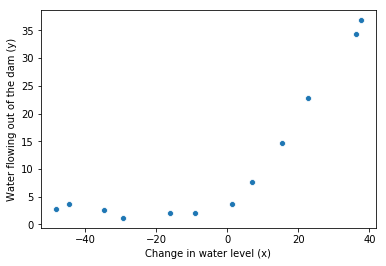

In [4]:
ax=sns.scatterplot(data['X'],data['y']);
ax.set(xlabel='Change in water level (x)',ylabel='Water flowing out of the dam (y)');

#### 1.2&nbsp;&nbsp;&nbsp;&nbsp;Regularized linear regression cost function

We discussed the three types of regularization in [Exercise-2](http://localhost:8888/notebooks/Documents/Personal/GitHub/ML-Coursera/Exercise-2/ex2.ipynb#Types-of-Regularization). Regularized cost function in linear regression looks something like this :

$$ J(\theta)=\frac{1}{2m}[\sum_{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)})^2+\lambda\sum_{j=1}^n\theta_j^2] $$

where $\lambda$ is a regularization parameter which controls the degree of regularization, thus help preventing overfitting. The regularizartion parameter puts a penalty on overall cost $J$. As the magnitude of model parameters $\theta_j$ increases, the penalty increases as well.

#### 1.3&nbsp;&nbsp;&nbsp;&nbsp;Regularized linear regression gradient

Correspondingly, the partial derivative of regularized linear regression's cost for $J$ is defined as :

$$ \frac{\partial}{\partial{\theta_0}}J(\theta)=\frac{1}{m}\sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}\;\;\;\;\text{for }j=0 $$

$$ \frac{\partial}{\partial{\theta_0}}J(\theta)=\frac{1}{m}[\sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}+\lambda\theta_j]\;\;\;\;\text{for }j\geq1 $$

**Using Gradient Descent Optimization Algorithm**
$$ \theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j}J(\theta) $$  

In [5]:
def predict(X,theta):
    '''Predicts using the Linear Model'''
    h=np.dot(X,theta.T)
    return h

In [6]:
def computeCost(X,y,theta,lmbda):
    '''Computes and returns the cost and gradient'''
    m=y.shape[0]
    h=predict(X,theta)
    J=(1/(2*m))*(np.power(h-y,2).sum()+lmbda*np.power(theta[:,1:],2).sum())
    grad=(1/m)*(np.dot((h-y).T,X)+lmbda*np.column_stack((np.zeros(shape=(1,1)),theta[:,1:])))
    return (J,grad)

In [7]:
X=data['X']
# Adding intercept column
X=np.column_stack((np.ones((m,1)),X))
y=data['y'].values.reshape((-1,1))
theta=np.ones((1,2))
lmbda=1

J,grad=computeCost(X,y,theta,lmbda)
print(f'REGULARIZED COST FUNCTION : {J:.3f}')
print(f'GRADIENT : {grad[0]}')

REGULARIZED COST FUNCTION : 303.993
GRADIENT : [-15.30301567 598.25074417]


#### 1.4&nbsp;&nbsp;&nbsp;&nbsp;Fitting linear regression

**In this part, we set the regularization parameter $\lambda$ to zero. Because our current implementation is trying to fit 2-dimensional $\theta$, regularization will not be incredibly helpful for a $\theta$ of such low dimension.**

In [8]:
def train(X,y,alpha,lmbda,iterations):
    '''Trains the linear regression model using gradient descent optimization algorithm'''
    theta=np.zeros((1,X.shape[1]))
    jHistory=[]
    for i in range(iterations):
        J,grad=computeCost(X,y,theta,lmbda)
        theta=theta-alpha*grad
        jHistory.append(J)
    return jHistory,theta

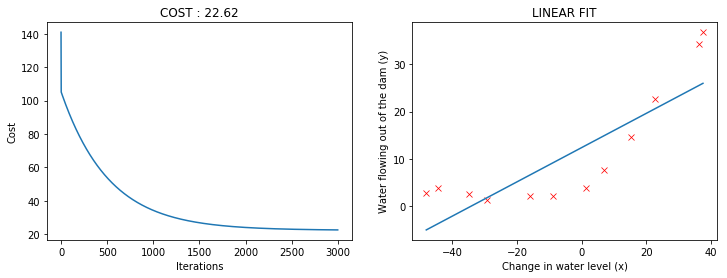

In [9]:
alpha=0.001
lmbda=0
iterations=3000

jHistory,theta=train(X,y,alpha,lmbda,iterations)

fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(12,4))
ch1=sns.lineplot(range(iterations),jHistory,ax=ax[0])
ch1.set(xlabel='Iterations',yLabel='Cost')
ax[0].set_title(f'COST : {jHistory[iterations-1]:.2f}')

sns.scatterplot(data['X'],data['y'],color='red',marker='x',ax=ax[1])
ch2=sns.lineplot(data['X'],predict(X,theta).reshape(-1),ax=ax[1])
ch2.set(xlabel='Change in water level (x)',ylabel='Water flowing out of the dam (y)')
ax[1].set_title('LINEAR FIT');